In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

(442, 10) (442,)
Coefficients: 
 [ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]
Mean squared error: 2004.52
Coefficient of determination: 0.59


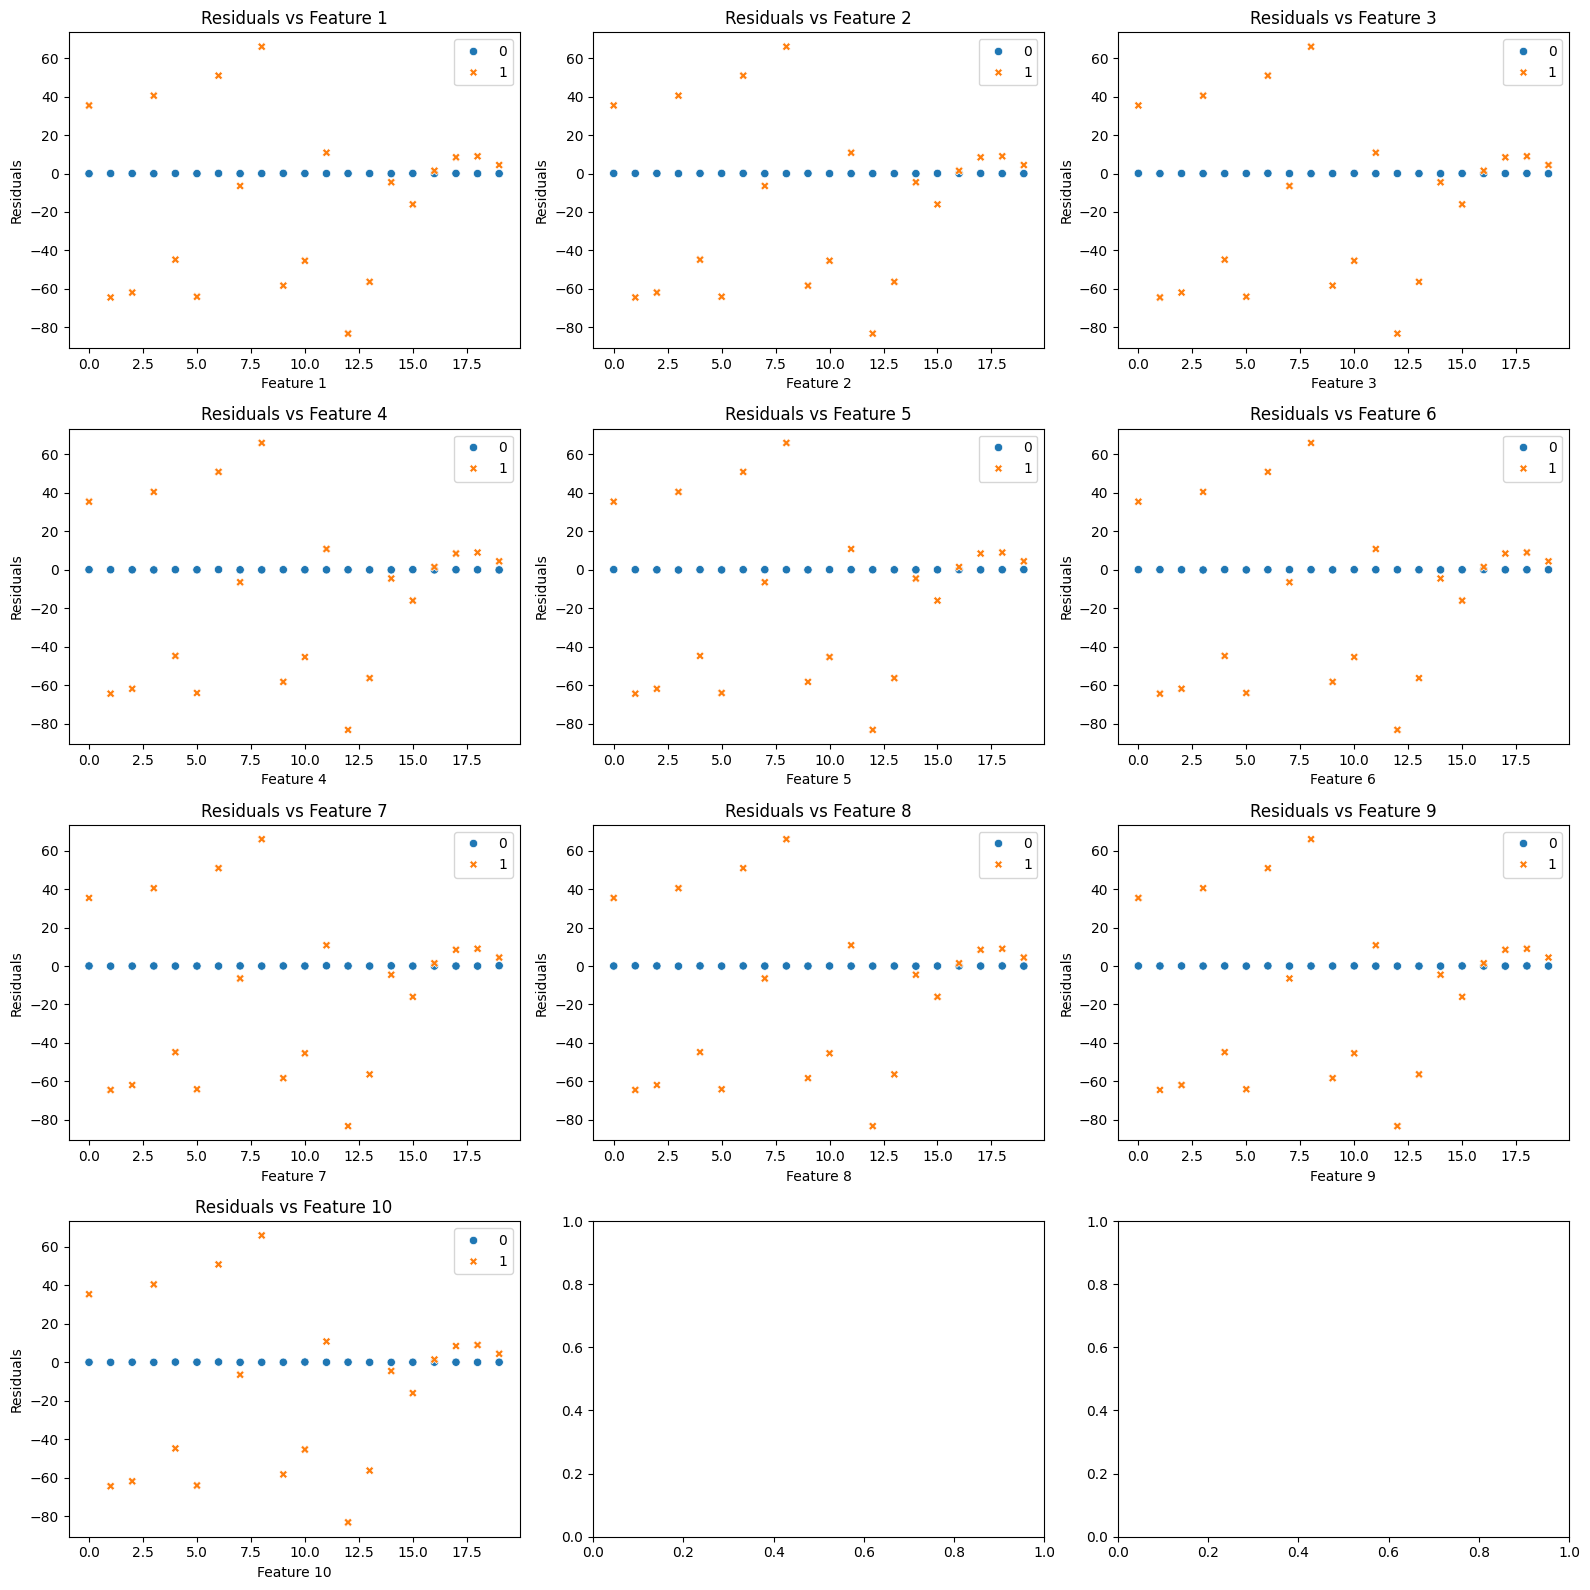

In [6]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_X.shape, diabetes_y.shape)

# # Use only one feature
# diabetes_X = diabetes_X[:, np.newaxis, 2]
# print(diabetes_X.shape, diabetes_Y.shape)

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot residuals for each feature
n_features = diabetes_X.shape[1]
fig, axes = plt.subplots(4, int(np.ceil(n_features / 4)), figsize=(16, 16))
axes = axes.flatten()

for i in range(n_features):
    sns.scatterplot([diabetes_X_test[:, i], diabetes_y_test - diabetes_y_pred], ax=axes[i])
    axes[i].set_title(f"Residuals vs Feature {i+1}")
    axes[i].set_xlabel(f"Feature {i+1}")
    axes[i].set_ylabel("Residuals")

plt.tight_layout()
plt.show()




Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


<Axes: xlabel='age', ylabel='target'>

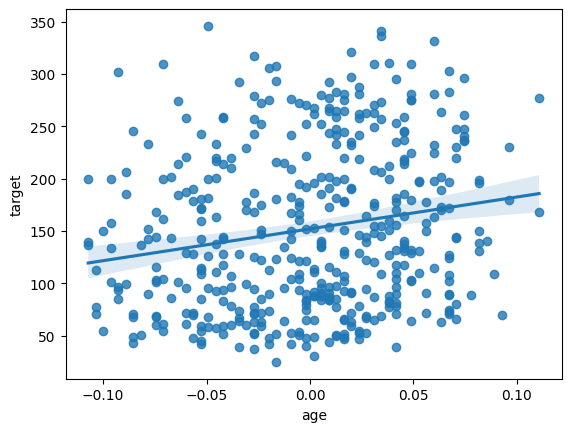

In [5]:
diabetes_data = datasets.load_diabetes()
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target
df.head()

print(df.columns)

sns.regplot(data=df, x="age", y="target")